# Task 1: Exploratory Data Analysis

### Importing Data and Dependencies

Dependancies :




In [ ]:
#Computing
import pandas as pd
import numpy as np
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Importing all the csv files :

In [ ]:
customers_df = pd.read_csv("/content/Customers.csv")

print(customers_df.head())

print("Shape of Customers df : " + str(customers_df.shape))

print("-" * 50)

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Shape of Customers df : (200, 4)
--------------------------------------------------


In [ ]:
products_df = pd.read_csv("/content/Products.csv")

print(products_df.head())

print("Shape of Products df : " + str(products_df.shape))

print("-" * 50)

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Shape of Products df : (100, 4)
--------------------------------------------------


In [ ]:
transactions_df = pd.read_csv("/content/Transactions.csv")

print(transactions_df.head())

print("Shape of Transactions df : " + str(transactions_df.shape))

print("-" * 50)

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
Shape of Transactions df : (1000, 7)
--------------------------------------------------


## Quality Checks on data:


#### 1. Check for Missing Values

In [ ]:
print(customers_df.isnull().sum())
print("-" * 50)

print(products_df.isnull().sum())
print("-" * 50)

print(transactions_df.isnull().sum())
print("-" * 50)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
--------------------------------------------------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
--------------------------------------------------
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
--------------------------------------------------


#### 2. Check for Duplicates

In [ ]:
print(customers_df.duplicated().sum())
customers_df = customers_df.drop_duplicates()

print(products_df.duplicated().sum())
products_df = products_df.drop_duplicates()

print(transactions_df.duplicated().sum())
transactions_df = transactions_df.drop_duplicates()

print("-" * 50)

0
0
0
--------------------------------------------------


#### 3. Verify Data Types


Ensuring that `SignupDate` and `TransactionDate` are in datetime format.

In [ ]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [ ]:
print(customers_df.dtypes)
print("-" * 50)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
--------------------------------------------------


In [ ]:
print(products_df.dtypes)
print("-" * 50)

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
--------------------------------------------------


In [ ]:
print(transactions_df.dtypes)
print("-" * 50)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object
--------------------------------------------------


#### 4. Validate Data Consistency

Verifying foreign key relationships:
1. Check if all `CustomerID` in `Transactions` dataframe exist in `Customers` dataframe.
2. Check if all `ProductID` in `Transactions` dataframe exist in `Products` dataframe.

In [ ]:
invalid_customers = transactions_df[~transactions_df['CustomerID'].isin(customers_df['CustomerID'])]
print("Invalid CustomerIDs: " + str(len(invalid_customers)))

invalid_products = transactions_df[~transactions_df['ProductID'].isin(products_df['ProductID'])]
print("Invalid ProductIDs: " + str(len(invalid_products)))

print("-" * 50)

Invalid CustomerIDs: 0
Invalid ProductIDs: 0
--------------------------------------------------


Validating `TotalValue` = `Price` × `Quantity` in `Transactions` dataframe

In [ ]:
transactions_df['ComputedValue'] = transactions_df['Price'] * transactions_df['Quantity']
invalid_values = transactions_df[transactions_df['TotalValue'] != transactions_df['ComputedValue']]
print("Rows with incorrect TotalValue: " + str(len(invalid_values)))

print("-" * 50)

Rows with incorrect TotalValue: 88
--------------------------------------------------




> Reminder to add something here as 88 rows have different value than calculated ones, main reason is that some of the values in totalvalues column are rounded off


## Descriptive Statistics of Data
To capture the central tendency, variability, and range of numerical data like `Price`, `Quantity`, `TotalValue`.


In [ ]:
print("Descriptive Statistics for Numerical Columns:")
print(transactions_df[['Price', 'Quantity', 'TotalValue']].describe())
print("-" * 50)

Descriptive Statistics for Numerical Columns:
            Price     Quantity   TotalValue
count  1000.00000  1000.000000  1000.000000
mean    272.55407     2.537000   689.995560
std     140.73639     1.117981   493.144478
min      16.08000     1.000000    16.080000
25%     147.95000     2.000000   295.295000
50%     299.93000     3.000000   588.880000
75%     404.40000     4.000000  1011.660000
max     497.76000     4.000000  1991.040000
--------------------------------------------------


To understand the distribution (unique entries) of non-numerical data, such as `Region` (from customers) and `Category` (from products)

In [ ]:
print("Region Distribution:")
print(customers_df['Region'].value_counts())
print("-" * 50)

print("\nProduct Categories Distribution:")
print(products_df['Category'].value_counts())
print("-" * 50)

Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
--------------------------------------------------

Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
--------------------------------------------------


Use boxplots to identify outliers for key columns like `Price` or `TotalValue`

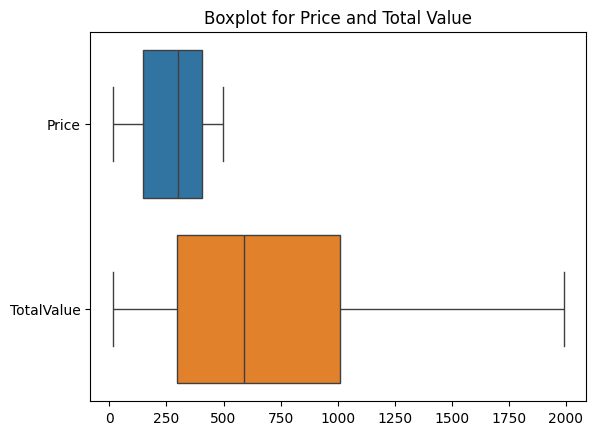

In [ ]:
sns.boxplot(data=transactions_df[['Price', 'TotalValue']], orient='h')
plt.title("Boxplot for Price and Total Value")
plt.show()

Aggregating data by groups provides insights into trends

1. Total sales by `Category`
2. Average quantity purchased by `Region`.


In [ ]:
print("Total Sales by Category:")
print(transactions_df.groupby('ProductID')['TotalValue'].sum().head())
print("-" * 50)

print("\nAverage Quantity Purchased by Region:")
merged_df = transactions_df.merge(customers_df, on='CustomerID')  # Merge for Region
print(merged_df.groupby('Region')['Quantity'].mean())
print("-" * 50)

Total Sales by Category:
ProductID
P001     3047.40
P002     8657.50
P003     1367.72
P004     1722.42
P005    10303.44
Name: TotalValue, dtype: float64
--------------------------------------------------

Average Quantity Purchased by Region:
Region
Asia             2.568807
Europe           2.542735
North America    2.430328
South America    2.595395
Name: Quantity, dtype: float64
--------------------------------------------------


## Merging of Data

Combining the datasets allows us to analyze the relationships between customers, products, and transactions holistically.

1. Merge `Transactions` Dataframe with `Products` Dataframe on `ProductID` to bring in product details.

2. Merge the resulting dataset with `Customers` dataframe on `CustomerID` to include customer details.

3. Validate the merge by checking the shape and sample rows.


In [ ]:
transactions_products = transactions_df.merge(products_df, on='ProductID', how='inner')

merged_data = transactions_products.merge(customers_df, on='CustomerID', how='inner')
print("-" * 50)

print("\nMerged Data Shape:", merged_data.shape)

print("-" * 50)


print(merged_data.head())

print("-" * 50)


--------------------------------------------------

Merged Data Shape: (1000, 14)
--------------------------------------------------
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x  ComputedValue                      ProductName  \
0      300.68   300.68         300.68  ComfortLiving Bluetooth Speaker   
1      300.68   300.68         300.68  ComfortLiving Bluetooth Speaker   
2      300.68   300.68         300.68  ComfortLiving Bluetooth Speaker   
3      601.36   300.68         601.36  ComfortLiving Bluetooth Speaker   
4      902.04   300.68         902.04  ComfortLiving Bluetooth Speaker   

 



> Final Data, after being merged for EDA



In [ ]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ComputedValue,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,1379.58,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,1839.44,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,919.72,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


#### Removing Redundent Columns



In [ ]:
print("Column Names in Merged Dataset:")
print(merged_data.columns)

Column Names in Merged Dataset:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ComputedValue', 'ProductName',
       'Category', 'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


In [ ]:
merged_data = merged_data.drop(columns=['Price_x'], errors='ignore')

merged_data.rename(columns={'Price_y': 'Price'}, inplace=True)

print("Updated Dataset Columns:")
print(merged_data.columns)


Updated Dataset Columns:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'ComputedValue', 'ProductName', 'Category',
       'Price', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


#### Handling Missing Values Post-Merge


Some rows might have missing data after the merge due to mismatches in `ProductID` or `CustomerID`

In [ ]:
print("Missing Values in Merged Data:")
print(merged_data.isnull().sum())

merged_data = merged_data.dropna()

Missing Values in Merged Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
ComputedValue      0
ProductName        0
Category           0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


## Feature Engineering
Deriving some features that can provide deeper insights into customer behavior and product trends.



Extracting `Month`, `Year`, and `Day of Week` from `TransactionDate` to understand temporal trends.

In [ ]:
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.month
merged_data['TransactionYear'] = pd.to_datetime(merged_data['TransactionDate']).dt.year
merged_data['TransactionDayOfWeek'] = pd.to_datetime(merged_data['TransactionDate']).dt.day_name()

Customer Lifetime Value (CLTV): Sum up `TotalValue` for each customer.

In [ ]:
cltv = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index(name='CustomerLifetimeValue')
print("-" * 50)
print("Top Customers by CLTV:")
print("-" * 50)
print(cltv.head())

--------------------------------------------------
Top Customers by CLTV:
--------------------------------------------------
  CustomerID  CustomerLifetimeValue
0      C0001                3354.52
1      C0002                1862.74
2      C0003                2725.38
3      C0004                5354.88
4      C0005                2034.24


Product Performance: Calculate `total sales` per product.

In [ ]:
product_performance = merged_data.groupby('ProductName')['TotalValue'].sum().reset_index(name='TotalSales').sort_values(by='TotalSales', ascending=False)

print("-" * 50)
print("Top Performing Products:")
print("-" * 50)

print(product_performance.head())
print("-" * 50)

print("Least Performing Products:")
print("-" * 50)

print(product_performance.tail())

--------------------------------------------------
Top Performing Products:
--------------------------------------------------
              ProductName  TotalSales
9   ActiveWear Smartwatch    39096.97
47   SoundWave Headphones    25211.64
52        SoundWave Novel    24507.90
4       ActiveWear Jacket    22712.56
6          ActiveWear Rug    22314.43
--------------------------------------------------
Least Performing Products:
--------------------------------------------------
                    ProductName  TotalSales
26      ComfortLiving Desk Lamp     1694.16
44  SoundWave Bluetooth Speaker     1223.22
30            ComfortLiving Rug     1063.81
10           ActiveWear T-Shirt      795.34
28         ComfortLiving Laptop      647.76


In [ ]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ComputedValue,ProductName,Category,Price,CustomerName,Region,SignupDate,TransactionMonth,TransactionYear,TransactionDayOfWeek
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,8,2024,Sunday
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04,5,2024,Monday
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,4,2024,Thursday
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,601.36,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11,3,2024,Tuesday
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,902.04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,3,2024,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22,10,2024,Thursday
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,1379.58,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07,6,2024,Tuesday
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,1839.44,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21,4,2024,Friday
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,919.72,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11,9,2024,Sunday


## Data Visualization
lets use visualizations to condense complex data into an easy-to-interpret format.




#### Bar Chart of Distribution of Customers by Region

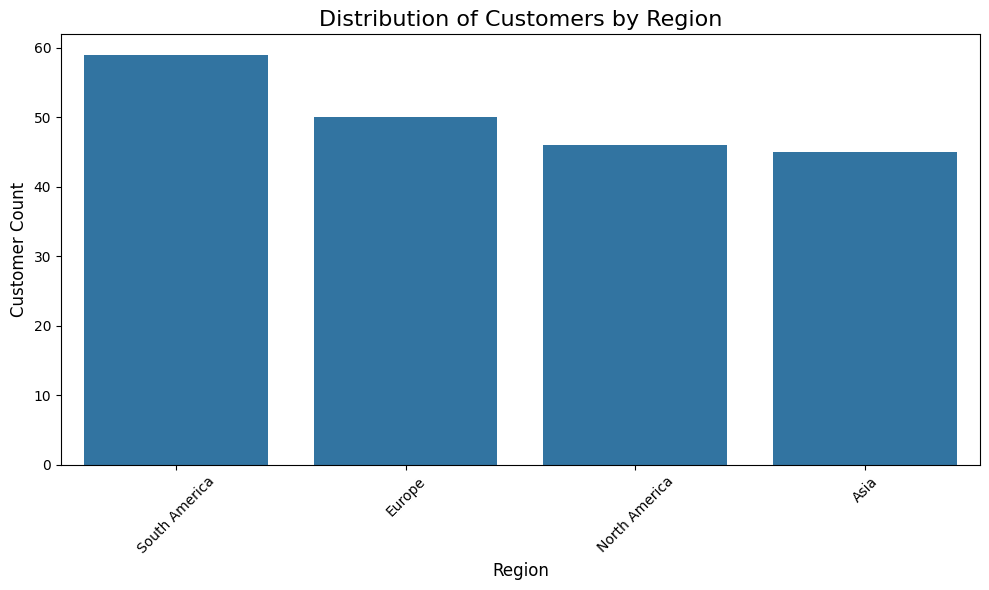

In [ ]:
region_distribution = customers_df['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Customer Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=region_distribution, x='Region', y='Customer Count')
plt.title("Distribution of Customers by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Line Chart of Monthly Sales Trend

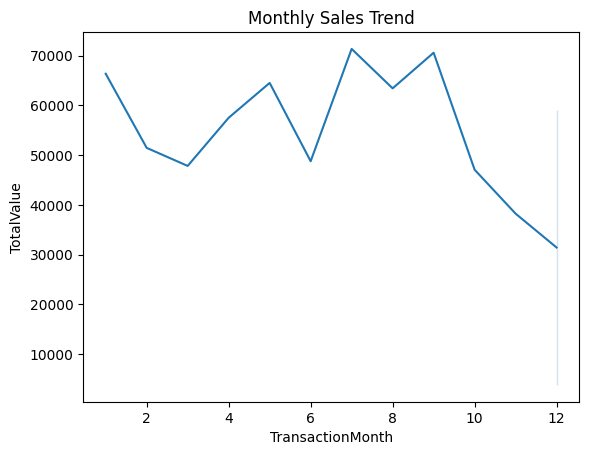

In [ ]:
monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth'])['TotalValue'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='TransactionMonth', y='TotalValue')
plt.title('Monthly Sales Trend')
plt.show()

#### Line Charts of Monthly Sales Trend by Categories of Product

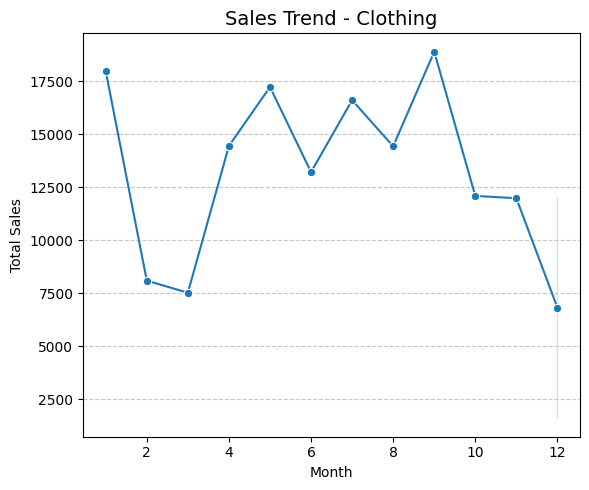

***************************************************************************


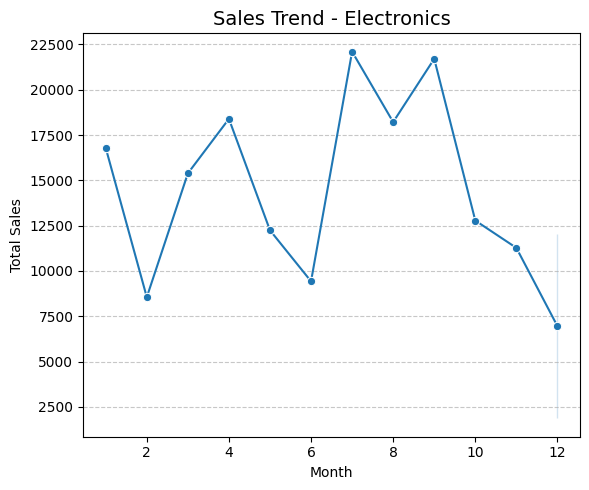

***************************************************************************


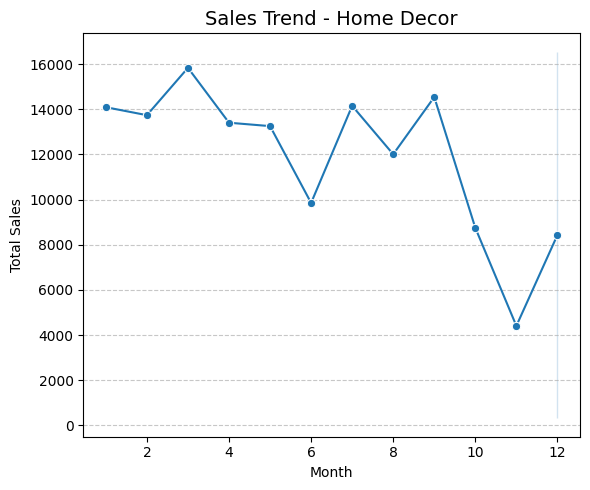

***************************************************************************


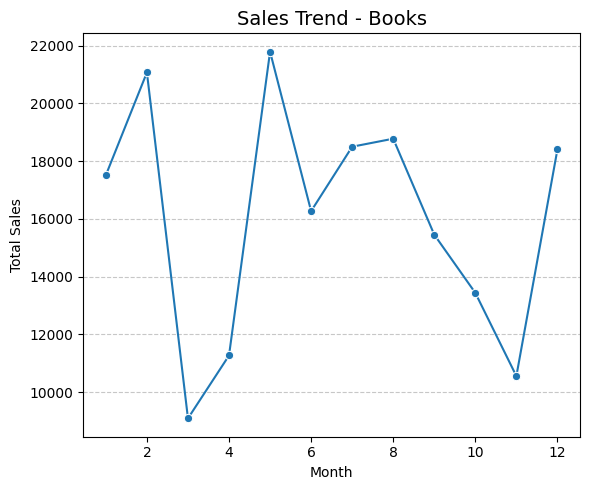

***************************************************************************


In [ ]:
category_monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth', 'Category'])['TotalValue'].sum().reset_index()

categories = category_monthly_sales['Category'].unique()

for category in categories:
    category_data = category_monthly_sales[category_monthly_sales['Category'] == category]

    plt.figure(figsize=(6, 5))
    sns.lineplot(
        data=category_data,
        x='TransactionMonth',
        y='TotalValue',
        marker='o'
    )
    plt.title(f'Sales Trend - {category}', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("*" * 75)

#### Line Charts of Monthly Sales Trend by different Regions

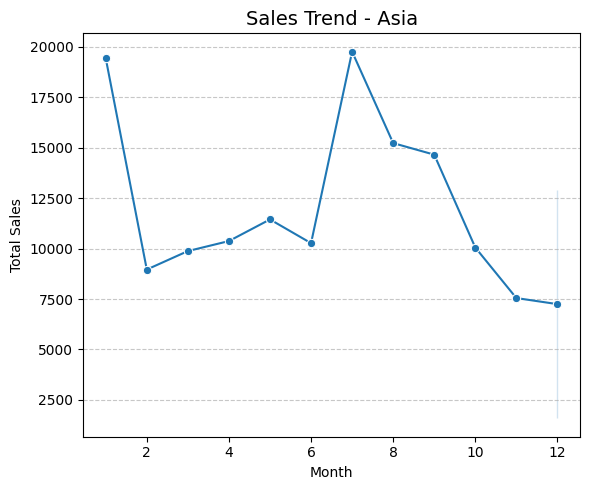

***************************************************************************


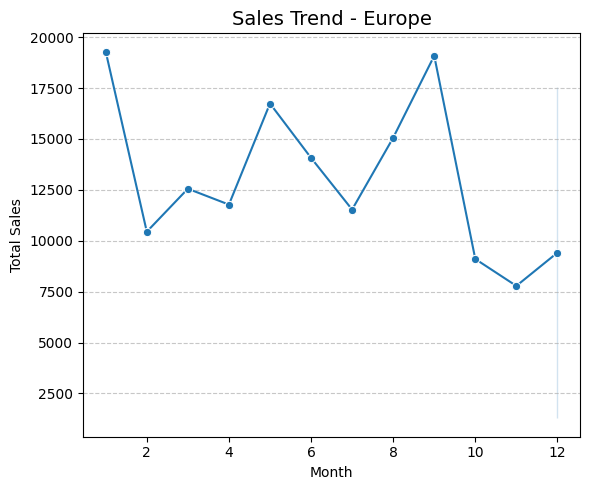

***************************************************************************


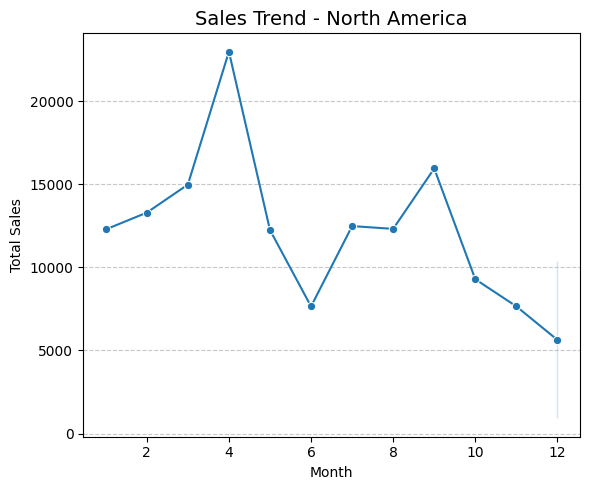

***************************************************************************


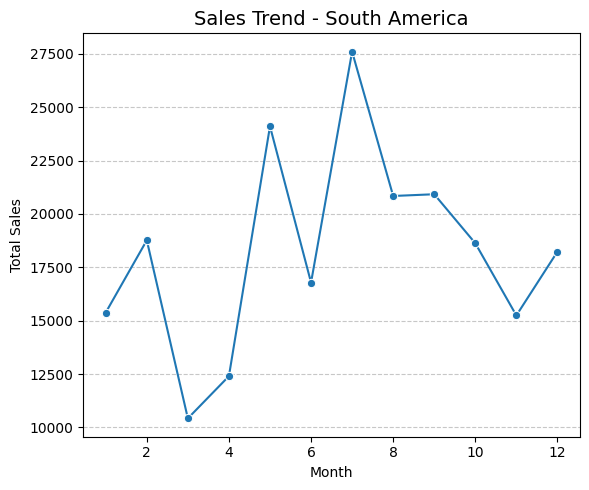

***************************************************************************


In [ ]:
region_monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth', 'Region'])['TotalValue'].sum().reset_index()

unique_regions = region_monthly_sales['Region'].unique()

for region in unique_regions:
    region_data = region_monthly_sales[region_monthly_sales['Region'] == region]

    plt.figure(figsize=(6, 5))
    sns.lineplot(
        data=region_data,
        x='TransactionMonth',
        y='TotalValue',
        marker='o'
    )
    plt.title(f'Sales Trend - {region}', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("*" * 75)

#### Line Chart of Sales Trend in Europe by Product Category.

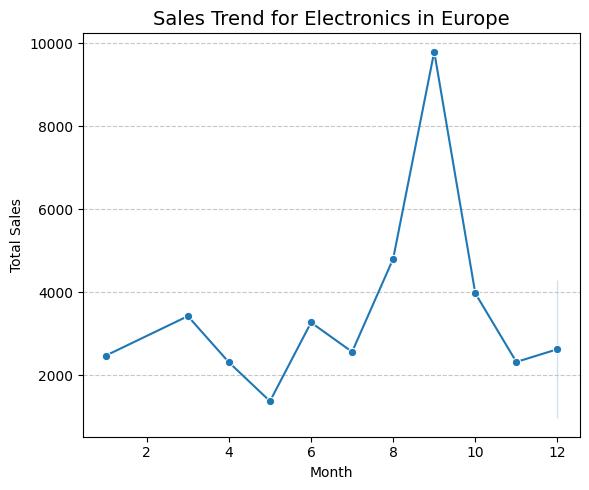

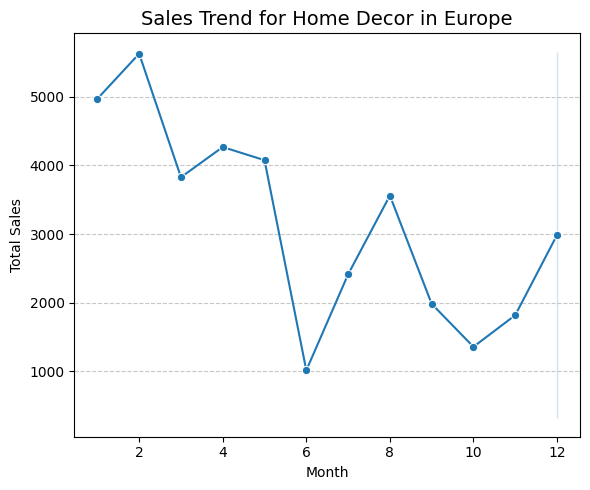

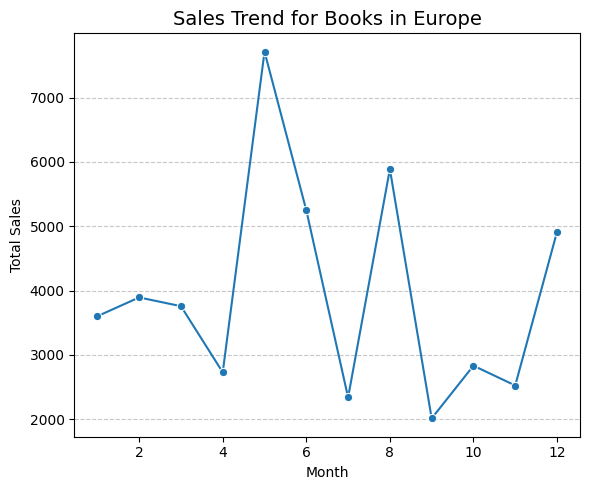

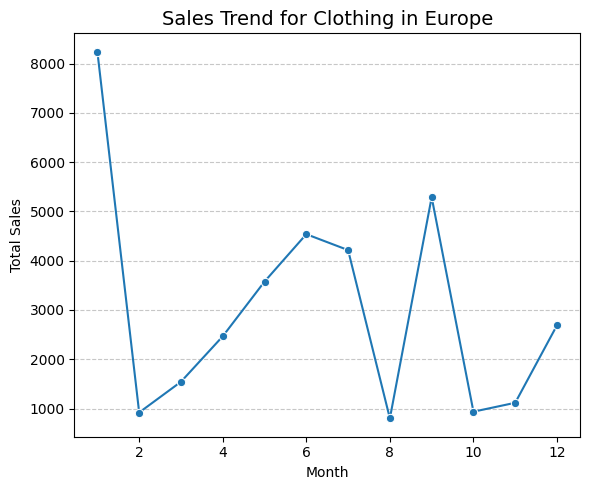

In [ ]:
region_category_monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth', 'Region', 'Category'])['TotalValue'].sum().reset_index()

europe_data = region_category_monthly_sales[region_category_monthly_sales['Region'] == 'Europe']

unique_categories = europe_data['Category'].unique()

for category in unique_categories:
    category_data = europe_data[europe_data['Category'] == category]

    plt.figure(figsize=(6, 5))
    sns.lineplot(
        data=category_data,
        x='TransactionMonth',
        y='TotalValue',
        marker='o'
    )
    plt.title(f'Sales Trend for {category} in Europe', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


#### Line Chart of Sales Trend in Asia by Product Category.

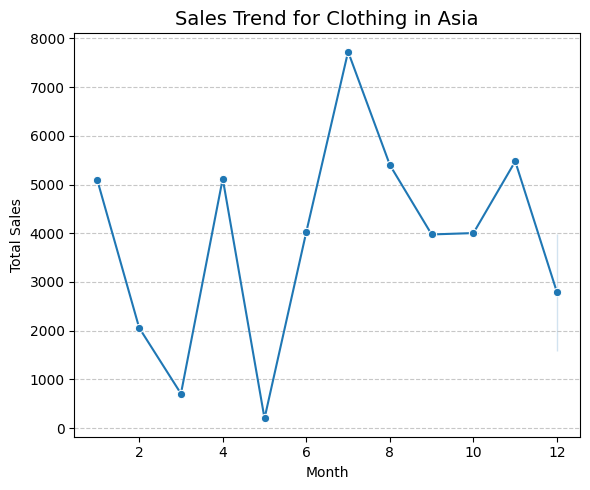

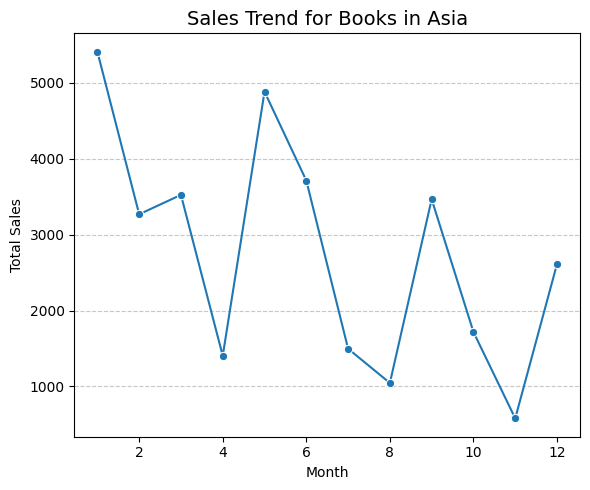

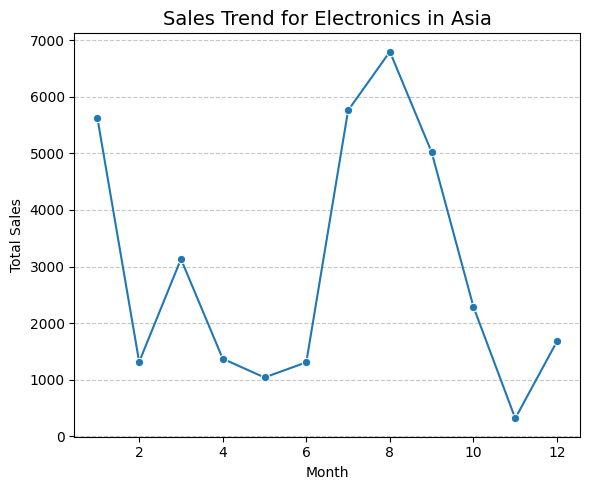

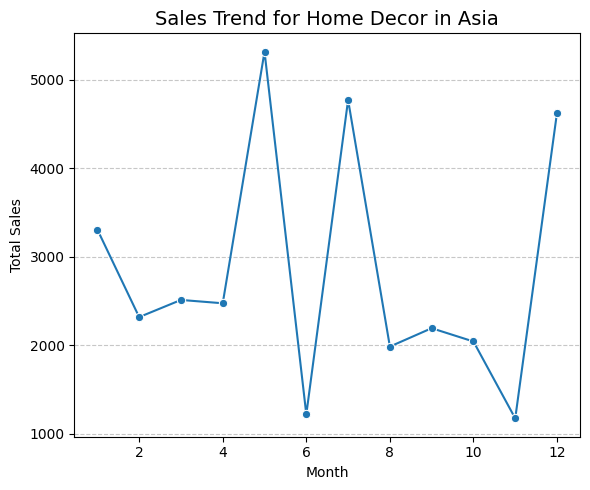

In [ ]:
region_category_monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth', 'Region', 'Category'])['TotalValue'].sum().reset_index()

asia_data = region_category_monthly_sales[region_category_monthly_sales['Region'] == 'Asia']

unique_categories = asia_data['Category'].unique()

for category in unique_categories:
    category_data = asia_data[asia_data['Category'] == category]

    plt.figure(figsize=(6, 5))
    sns.lineplot(
        data=category_data,
        x='TransactionMonth',
        y='TotalValue',
        marker='o'
    )
    plt.title(f'Sales Trend for {category} in Asia', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Line Chart of Sales Trend in North America by Product Category.

---



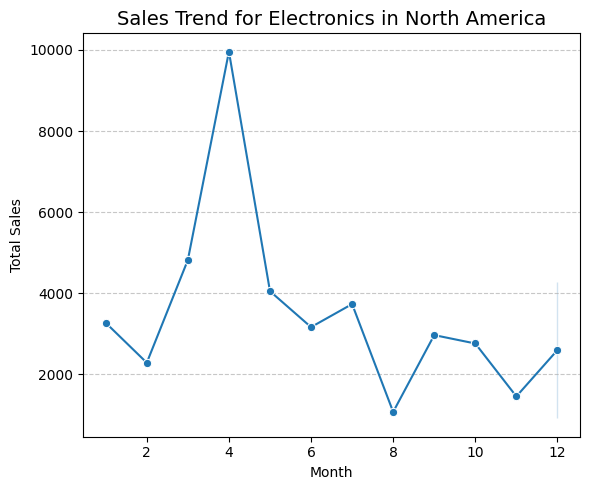

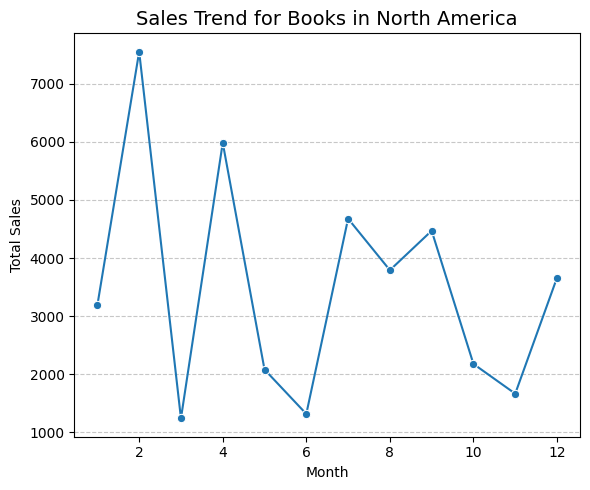

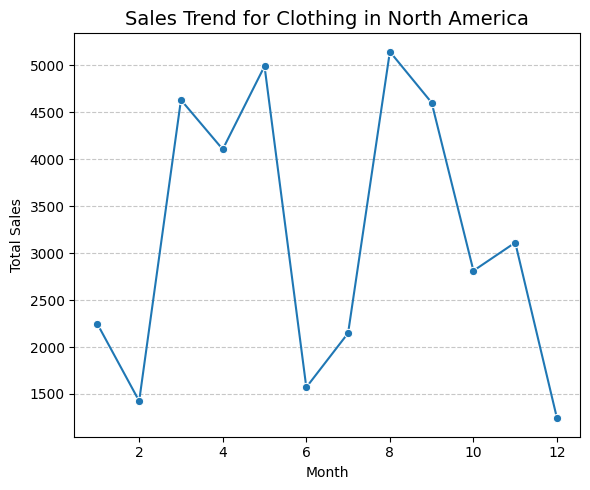

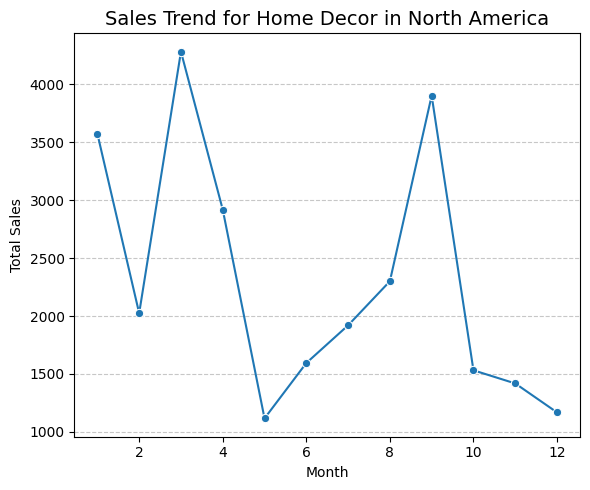

In [ ]:
region_category_monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth', 'Region', 'Category'])['TotalValue'].sum().reset_index()

na_data = region_category_monthly_sales[region_category_monthly_sales['Region'] == 'North America']

unique_categories = na_data['Category'].unique()

for category in unique_categories:
    category_data = na_data[na_data['Category'] == category]

    plt.figure(figsize=(6, 5))
    sns.lineplot(
        data=category_data,
        x='TransactionMonth',
        y='TotalValue',
        marker='o'
    )
    plt.title(f'Sales Trend for {category} in North America', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Line Chart of Sales Trend in South America by Product Category.
---

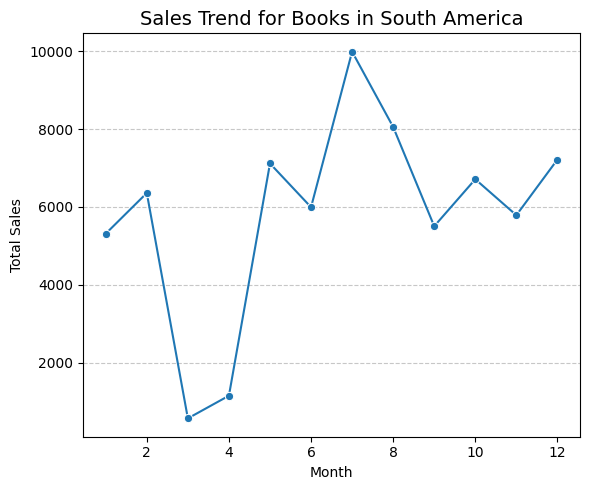

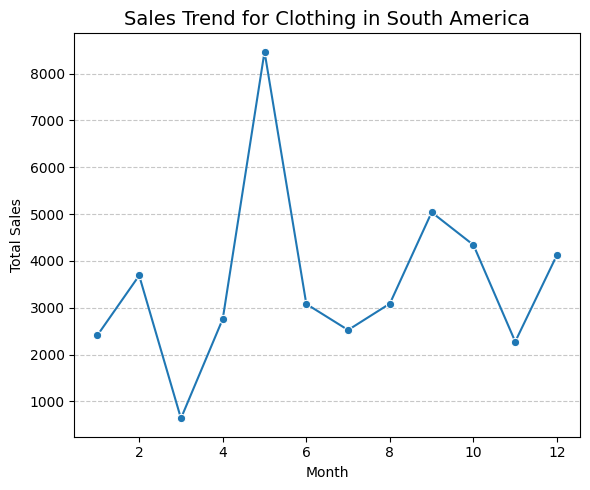

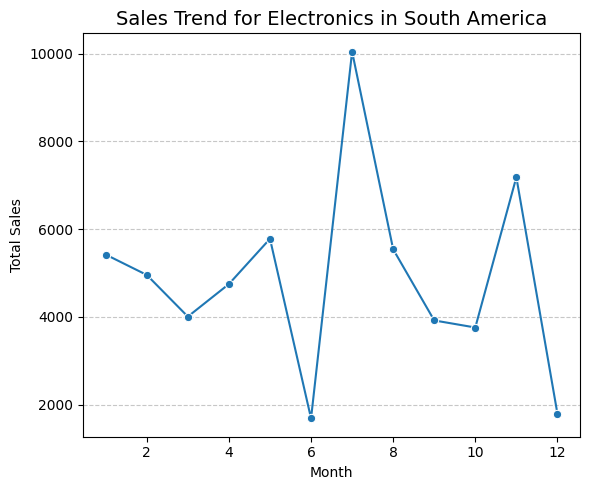

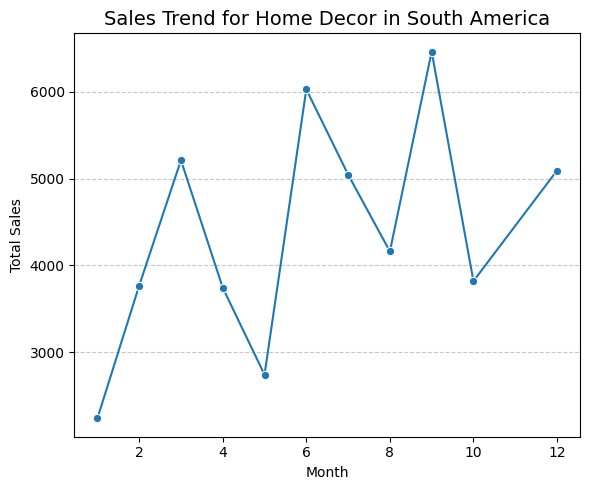

In [ ]:
region_category_monthly_sales = merged_data.groupby(['TransactionYear', 'TransactionMonth', 'Region', 'Category'])['TotalValue'].sum().reset_index()

sa_data = region_category_monthly_sales[region_category_monthly_sales['Region'] == 'South America']

unique_categories = sa_data['Category'].unique()

for category in unique_categories:
    category_data = sa_data[sa_data['Category'] == category]

    plt.figure(figsize=(6, 5))
    sns.lineplot(
        data=category_data,
        x='TransactionMonth',
        y='TotalValue',
        marker='o'
    )
    plt.title(f'Sales Trend for {category} in South America', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Pie Chart of distribution of Sales by Product Category.

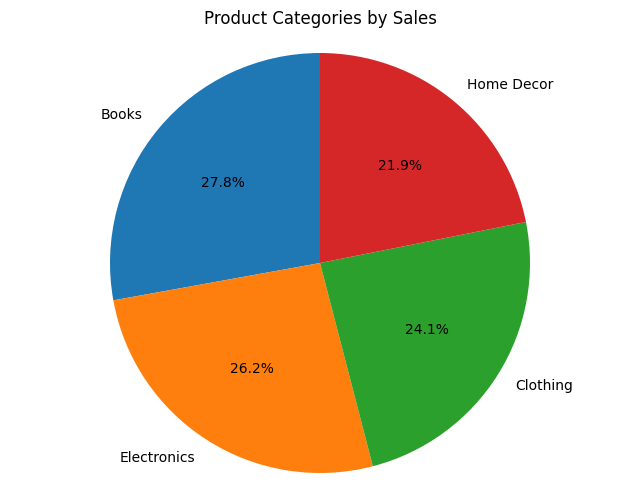

In [ ]:
top_categories = (merged_data.groupby('Category')['TotalValue']
                  .sum()
                  .sort_values(ascending=False)
                  .reset_index()
                  .head(4))
plt.figure(figsize=(8, 6))
plt.pie(
    top_categories['TotalValue'],
    labels=top_categories['Category'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Product Categories by Sales")
plt.axis('equal')
plt.show()


#### Pie Chart of distribution of Sales by Product Category in each Region
---

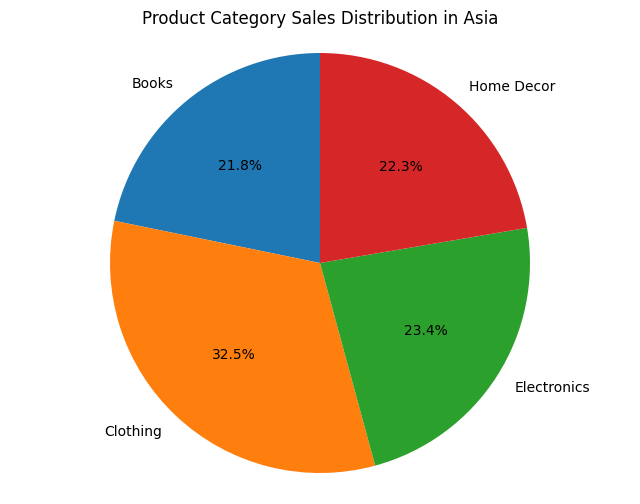

***************************************************************************


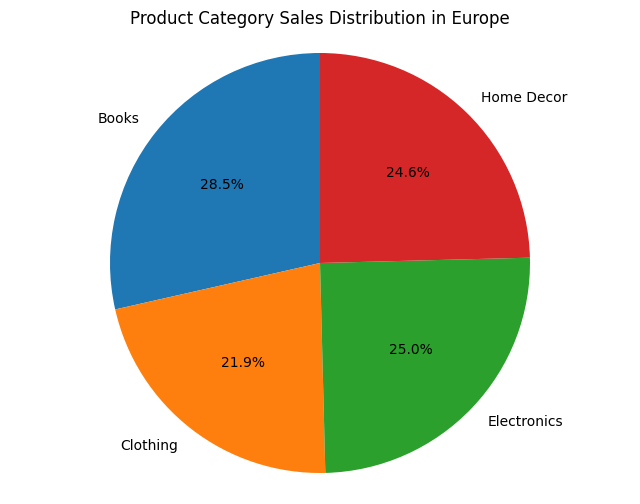

***************************************************************************


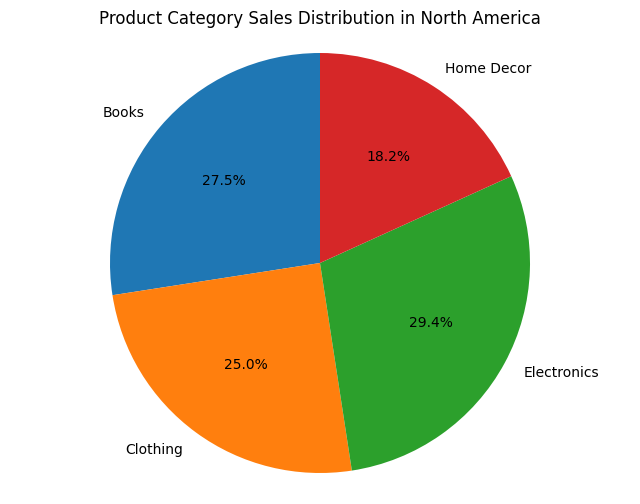

***************************************************************************


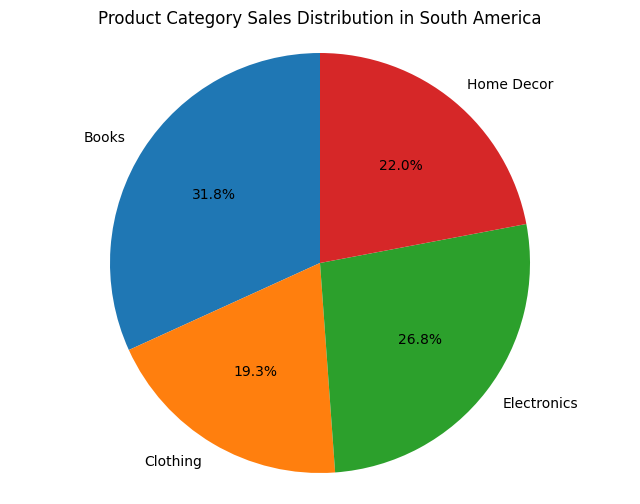

***************************************************************************


In [ ]:
continent_category_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

unique_regions = continent_category_sales['Region'].unique()
for region in unique_regions:
    region_data = continent_category_sales[continent_category_sales['Region'] == region]

    plt.figure(figsize=(8, 6))
    plt.pie(
        region_data['TotalValue'],
        labels=region_data['Category'],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"Product Category Sales Distribution in {region}")
    plt.axis('equal')
    plt.show()
    print("*" * 75)


#### Bar Plot to summerize sales by Category and Region

<Figure size 1200x700 with 0 Axes>

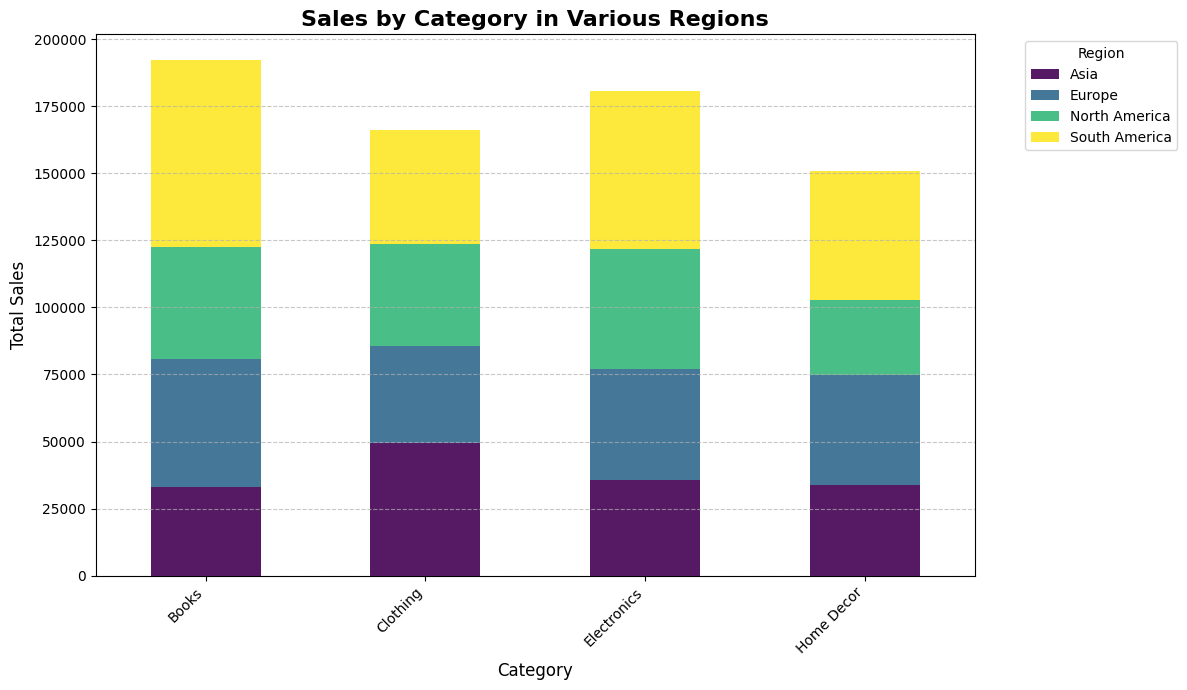

In [ ]:
category_region_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

pivot_data = category_region_sales.pivot(index='Category', columns='Region', values='TotalValue').fillna(0)

plt.figure(figsize=(12, 7))
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis', alpha=0.9)

plt.title('Sales by Category in Various Regions', fontsize=16, weight='bold')
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

### Electronics Sales Break up

Merging Data to Get Only the Data Related to Electronics

In [ ]:
electronics_data = merged_data[merged_data['Category'] == 'Electronics']

product_sales = electronics_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
region_sales = electronics_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
monthly_sales = electronics_data.groupby(electronics_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

monthly_sales = monthly_sales[monthly_sales != 0]


#### Top 15 Products in Electronics by Sales


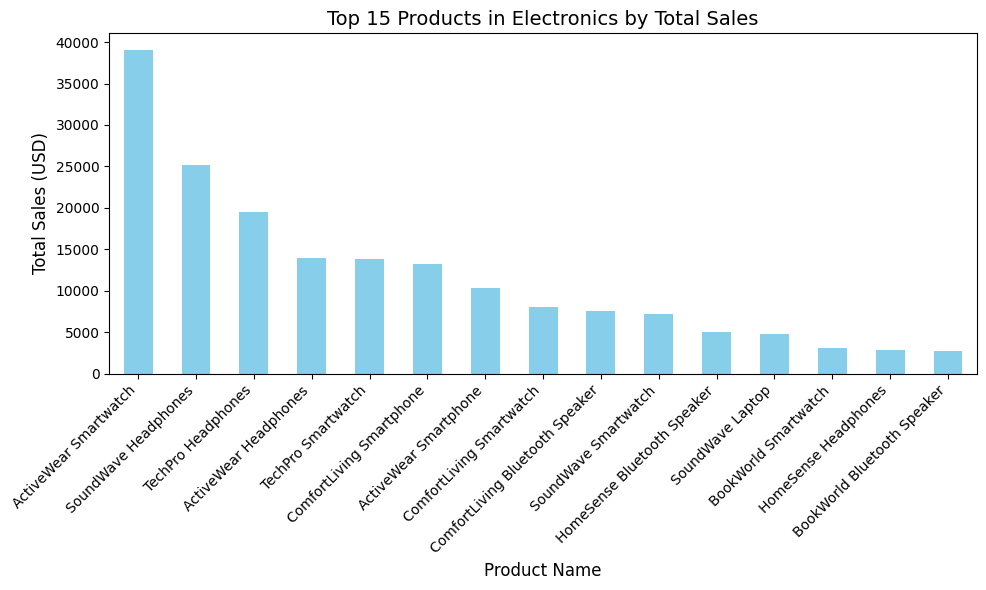

In [ ]:
plt.figure(figsize=(10, 6))
product_sales.head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Products in Electronics by Total Sales", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Electronic Sales in each Region


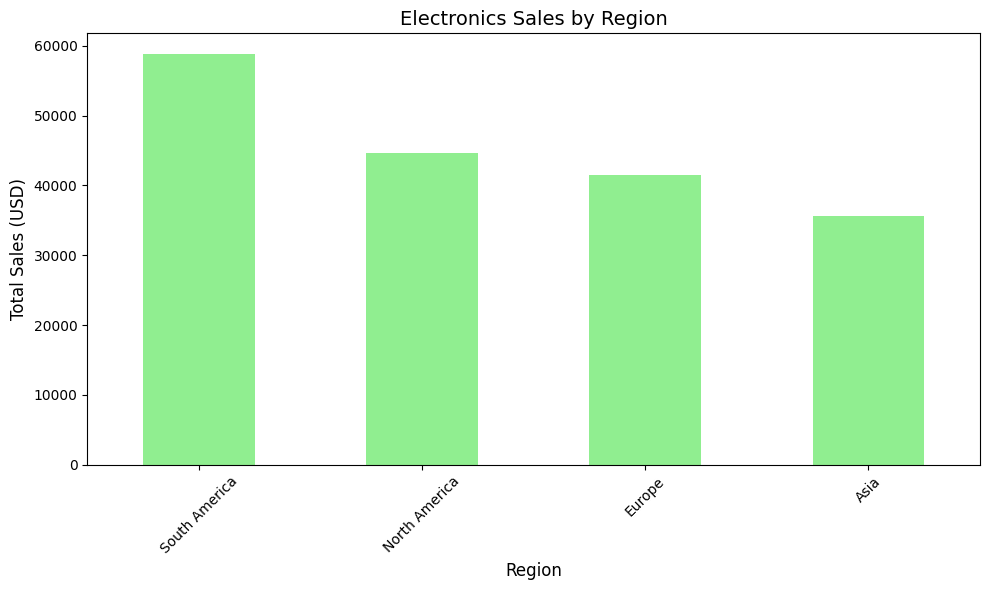

In [ ]:
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='lightgreen')
plt.title("Electronics Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Monthly Sales Trend for Electronics

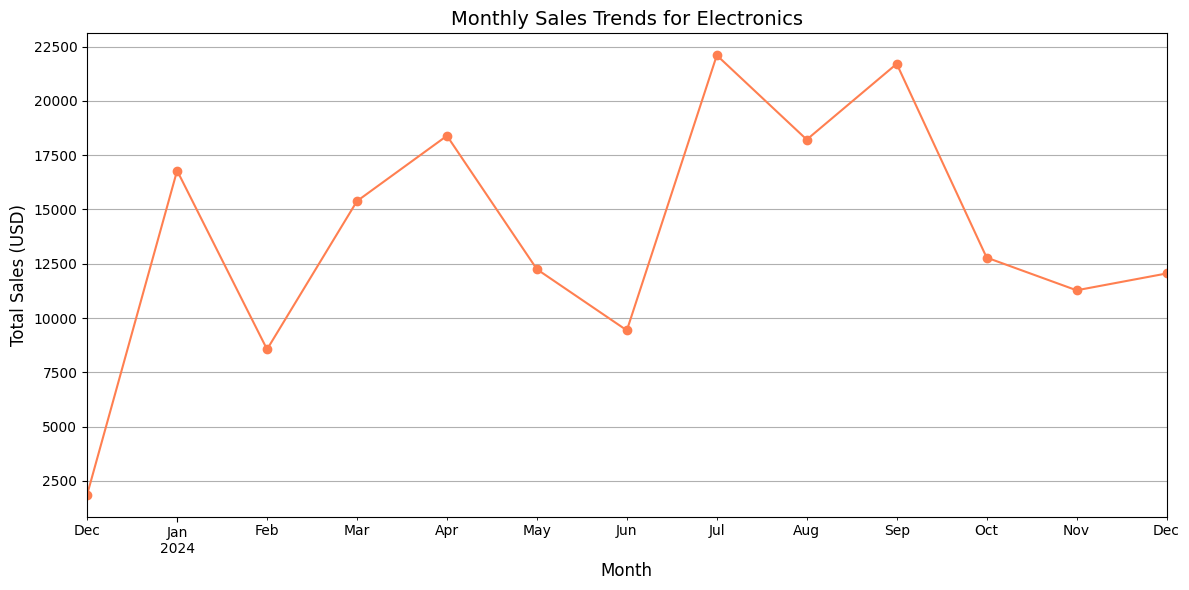

In [ ]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='coral')
plt.title("Monthly Sales Trends for Electronics", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Top 5 Products in Electronics for Each Region

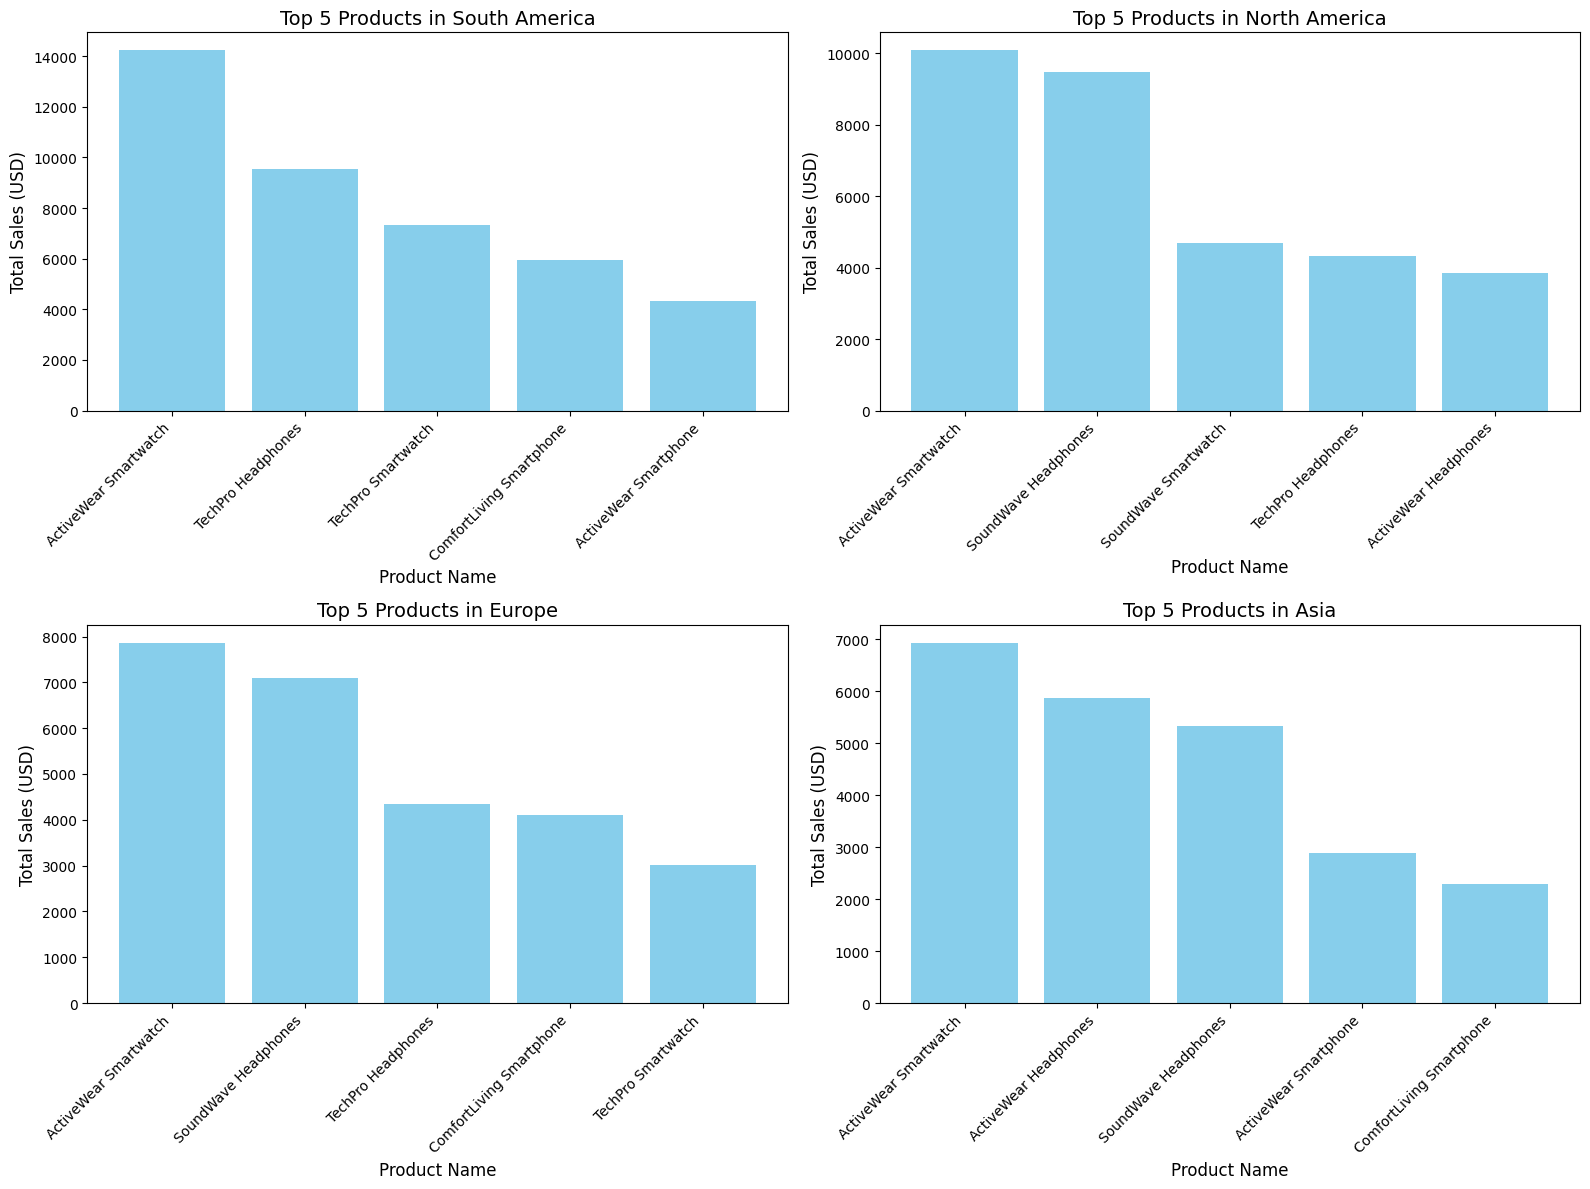

In [ ]:
top_regions = region_sales.head(4).index

filtered_data = electronics_data[electronics_data['Region'].isin(top_regions)]

region_product_sales = (
    filtered_data.groupby(['Region', 'ProductName'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(by='TotalValue', ascending=False)
)

top_products_per_region = (
    region_product_sales.groupby('Region')
    .head(5)
    .sort_values(['Region', 'TotalValue'], ascending=[True, False])
)

plt.figure(figsize=(16, 12))

for idx, region in enumerate(top_regions, 1):
    region_data = top_products_per_region[top_products_per_region['Region'] == region]

    plt.subplot(2, 2, idx)
    plt.bar(region_data['ProductName'], region_data['TotalValue'], color='skyblue')
    plt.title(f"Top 5 Products in {region}", fontsize=14)
    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Total Sales (USD)", fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Home Decor Sales Break up

Merging data to get only the data related to Home Decor

In [ ]:
home_decor_data = merged_data[merged_data['Category'] == 'Home Decor']

home_decor_product_sales = home_decor_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
home_decor_region_sales = home_decor_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
home_decor_monthly_sales = home_decor_data.groupby(home_decor_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

home_decor_monthly_sales = home_decor_monthly_sales[home_decor_monthly_sales != 0]


#### Top 10 Products in Home Decor by Sales

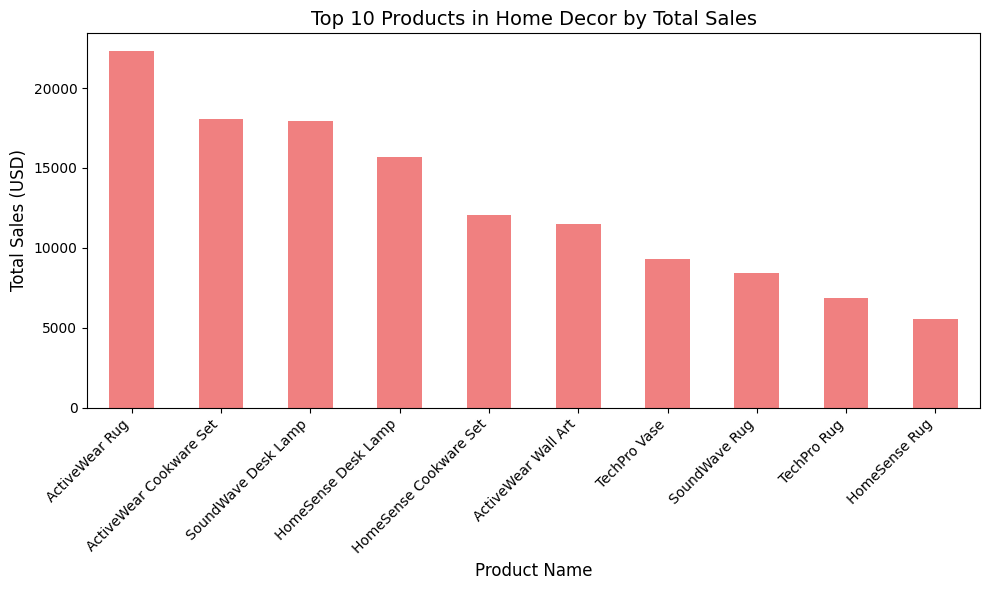

In [ ]:
plt.figure(figsize=(10, 6))
home_decor_product_sales.head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Products in Home Decor by Total Sales", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Home Decor Sales by Region

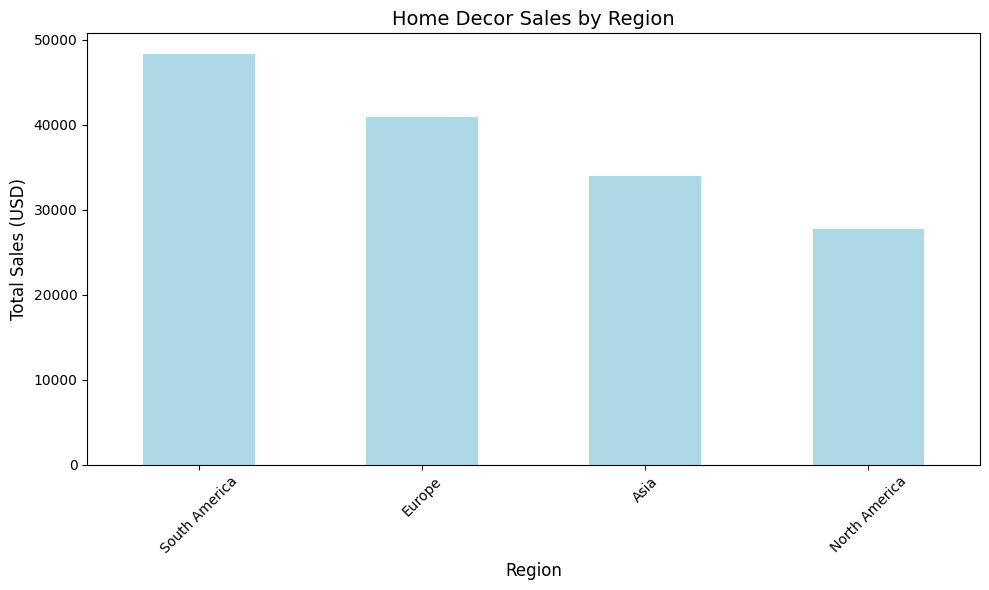

In [ ]:
plt.figure(figsize=(10, 6))
home_decor_region_sales.plot(kind='bar', color='lightblue')
plt.title("Home Decor Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Monthly Sales Trend in Home Decor Segment

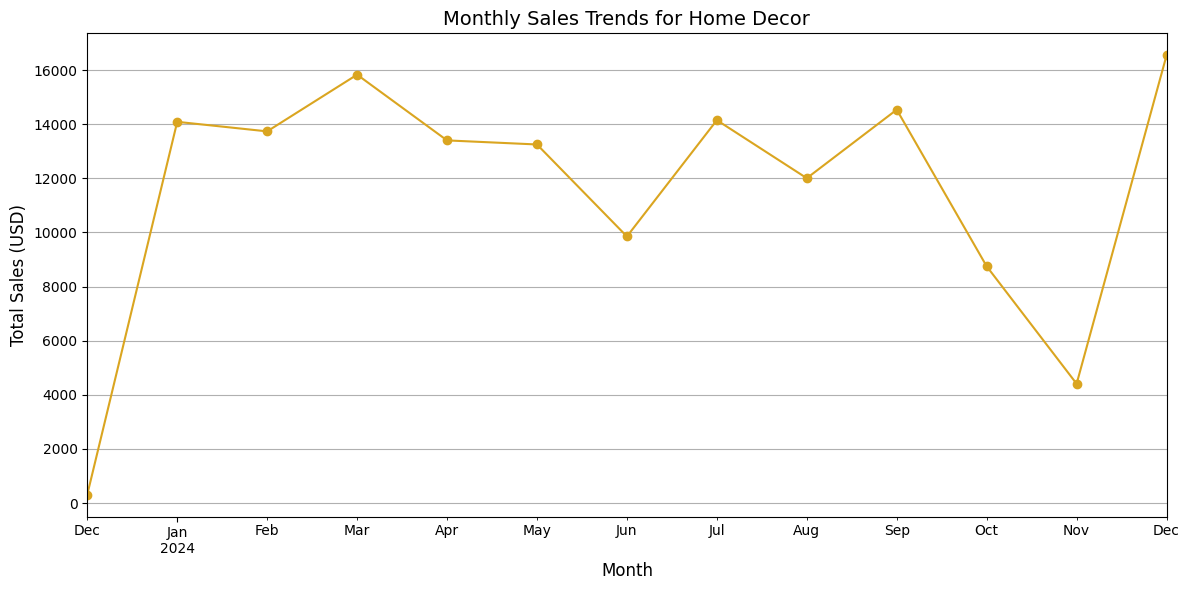

In [ ]:
plt.figure(figsize=(12, 6))
home_decor_monthly_sales.plot(kind='line', marker='o', color='goldenrod')
plt.title("Monthly Sales Trends for Home Decor", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Top 5 Products of Home Decor in each Region

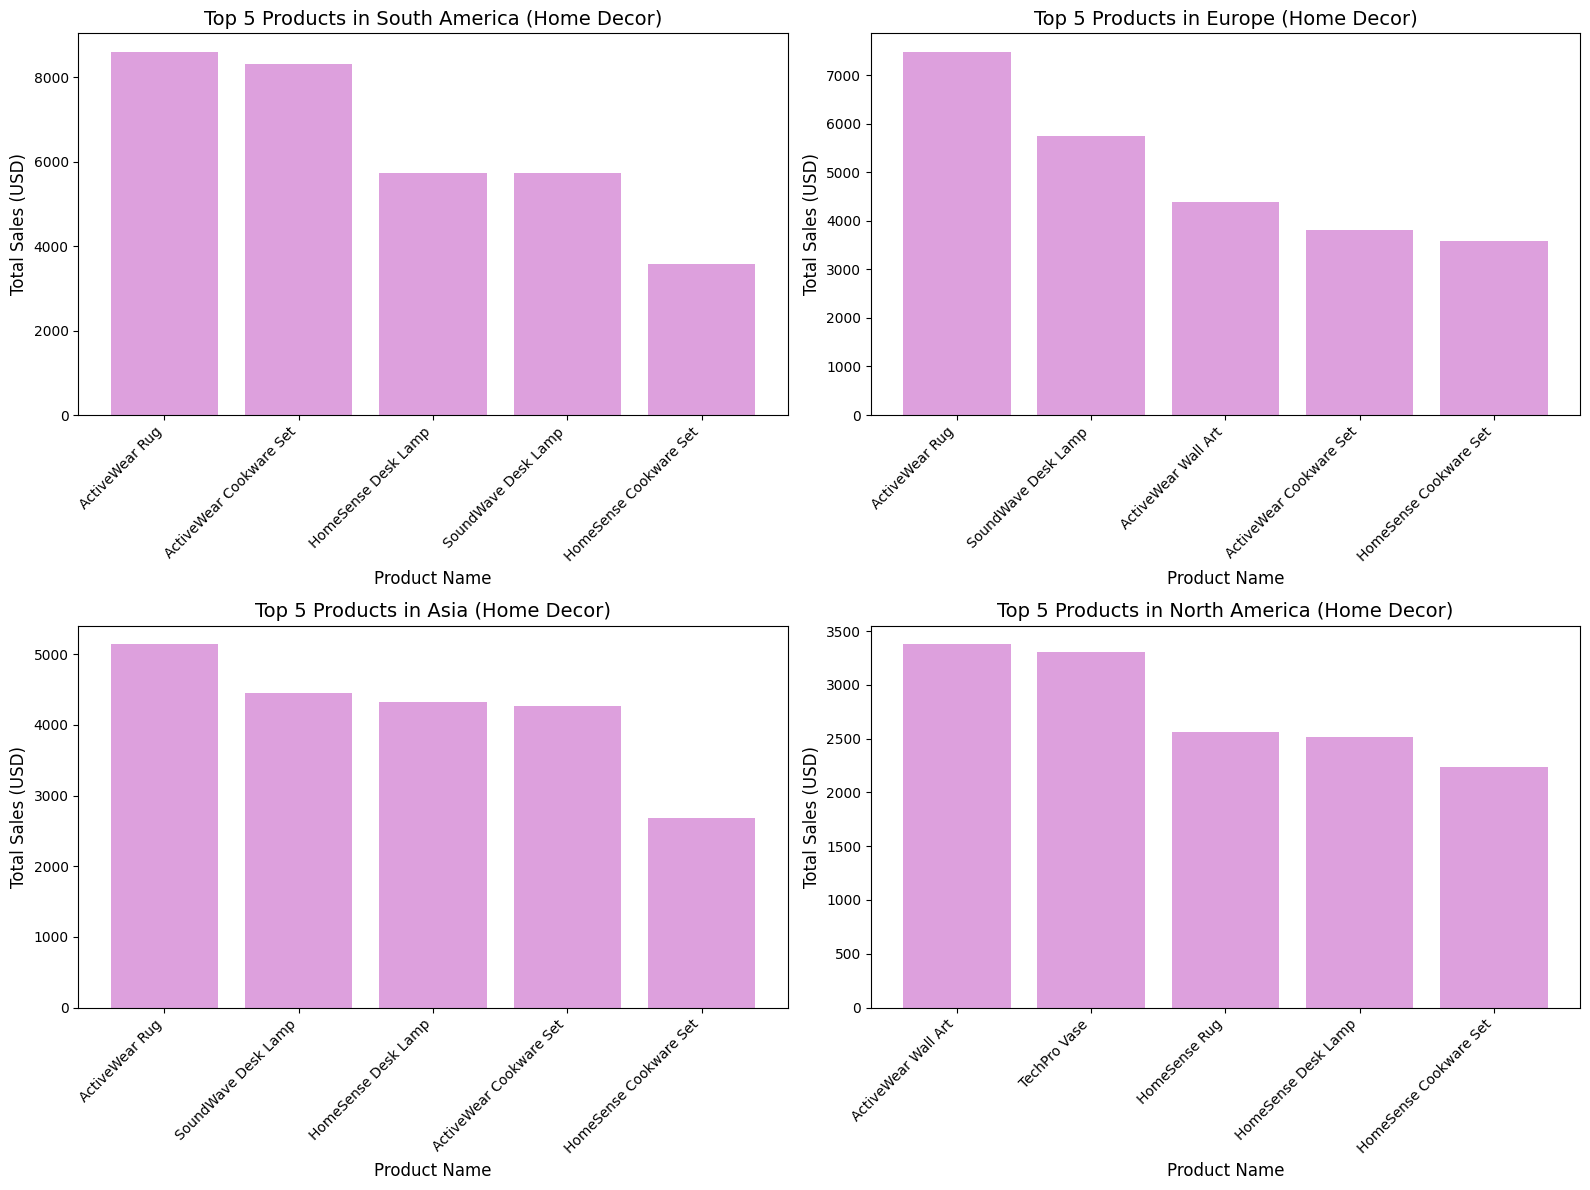

In [ ]:
home_decor_regions = home_decor_region_sales.index

home_decor_filtered_data = home_decor_data[home_decor_data['Region'].isin(home_decor_regions)]

home_decor_region_product_sales = (
    home_decor_filtered_data.groupby(['Region', 'ProductName'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(by='TotalValue', ascending=False)
)

home_decor_top_products_per_region = (
    home_decor_region_product_sales.groupby('Region')
    .head(5)
    .sort_values(['Region', 'TotalValue'], ascending=[True, False])
)

plt.figure(figsize=(16, 12))

for idx, region in enumerate(home_decor_regions, 1):
    region_data = home_decor_top_products_per_region[home_decor_top_products_per_region['Region'] == region]

    plt.subplot(2, 2, idx)
    plt.bar(region_data['ProductName'], region_data['TotalValue'], color='plum')
    plt.title(f"Top 5 Products in {region} (Home Decor)", fontsize=14)
    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Total Sales (USD)", fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Clothing Sales Break up

Merging Data to Get Only the Data Related to Clothing


In [ ]:
clothing_data = merged_data[merged_data['Category'] == 'Clothing']

clothing_product_sales = clothing_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
clothing_region_sales = clothing_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
clothing_monthly_sales = clothing_data.groupby(clothing_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

#### Top 10 Products in Clothing by Sales

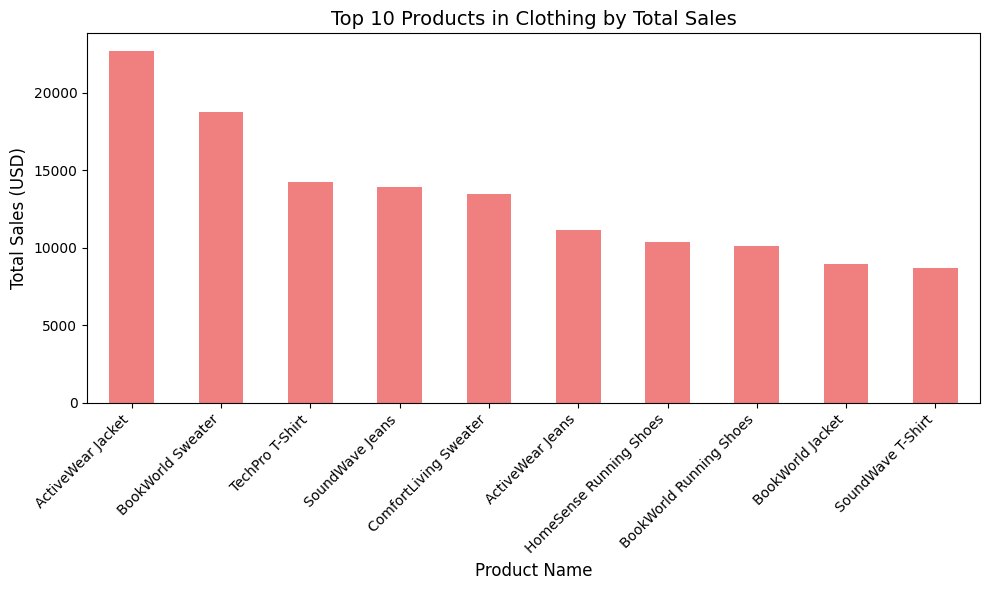

In [ ]:
plt.figure(figsize=(10, 6))
clothing_product_sales.head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Products in Clothing by Total Sales", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Clothing Sales by Region

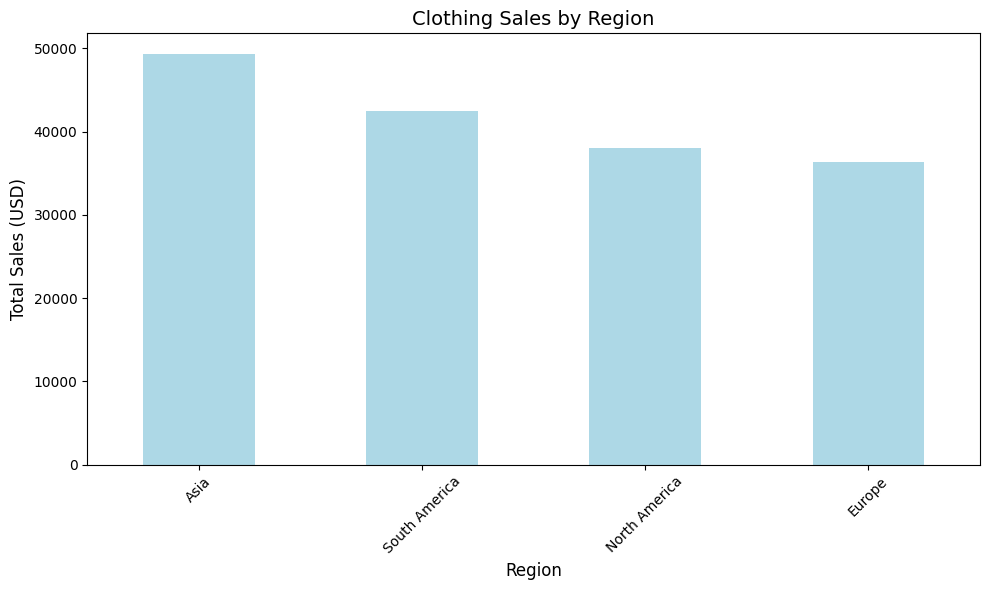

In [ ]:
plt.figure(figsize=(10, 6))
clothing_region_sales.plot(kind='bar', color='lightblue')
plt.title("Clothing Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Monthly Clothing Sales Trend

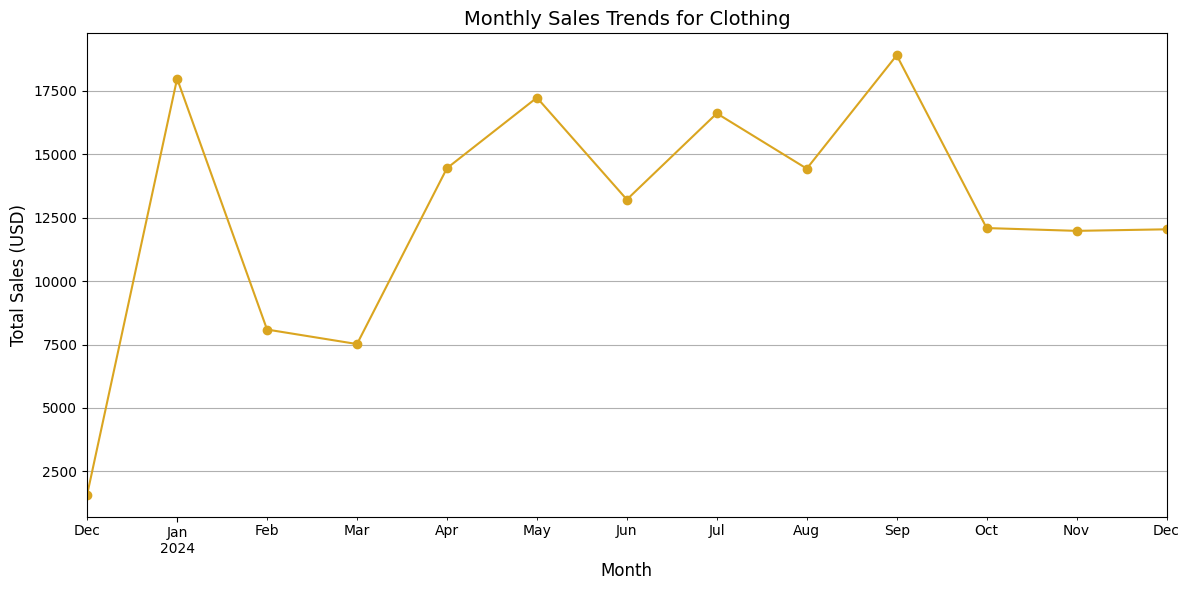

In [ ]:
plt.figure(figsize=(12, 6))
clothing_monthly_sales.plot(kind='line', marker='o', color='goldenrod')
plt.title("Monthly Sales Trends for Clothing", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

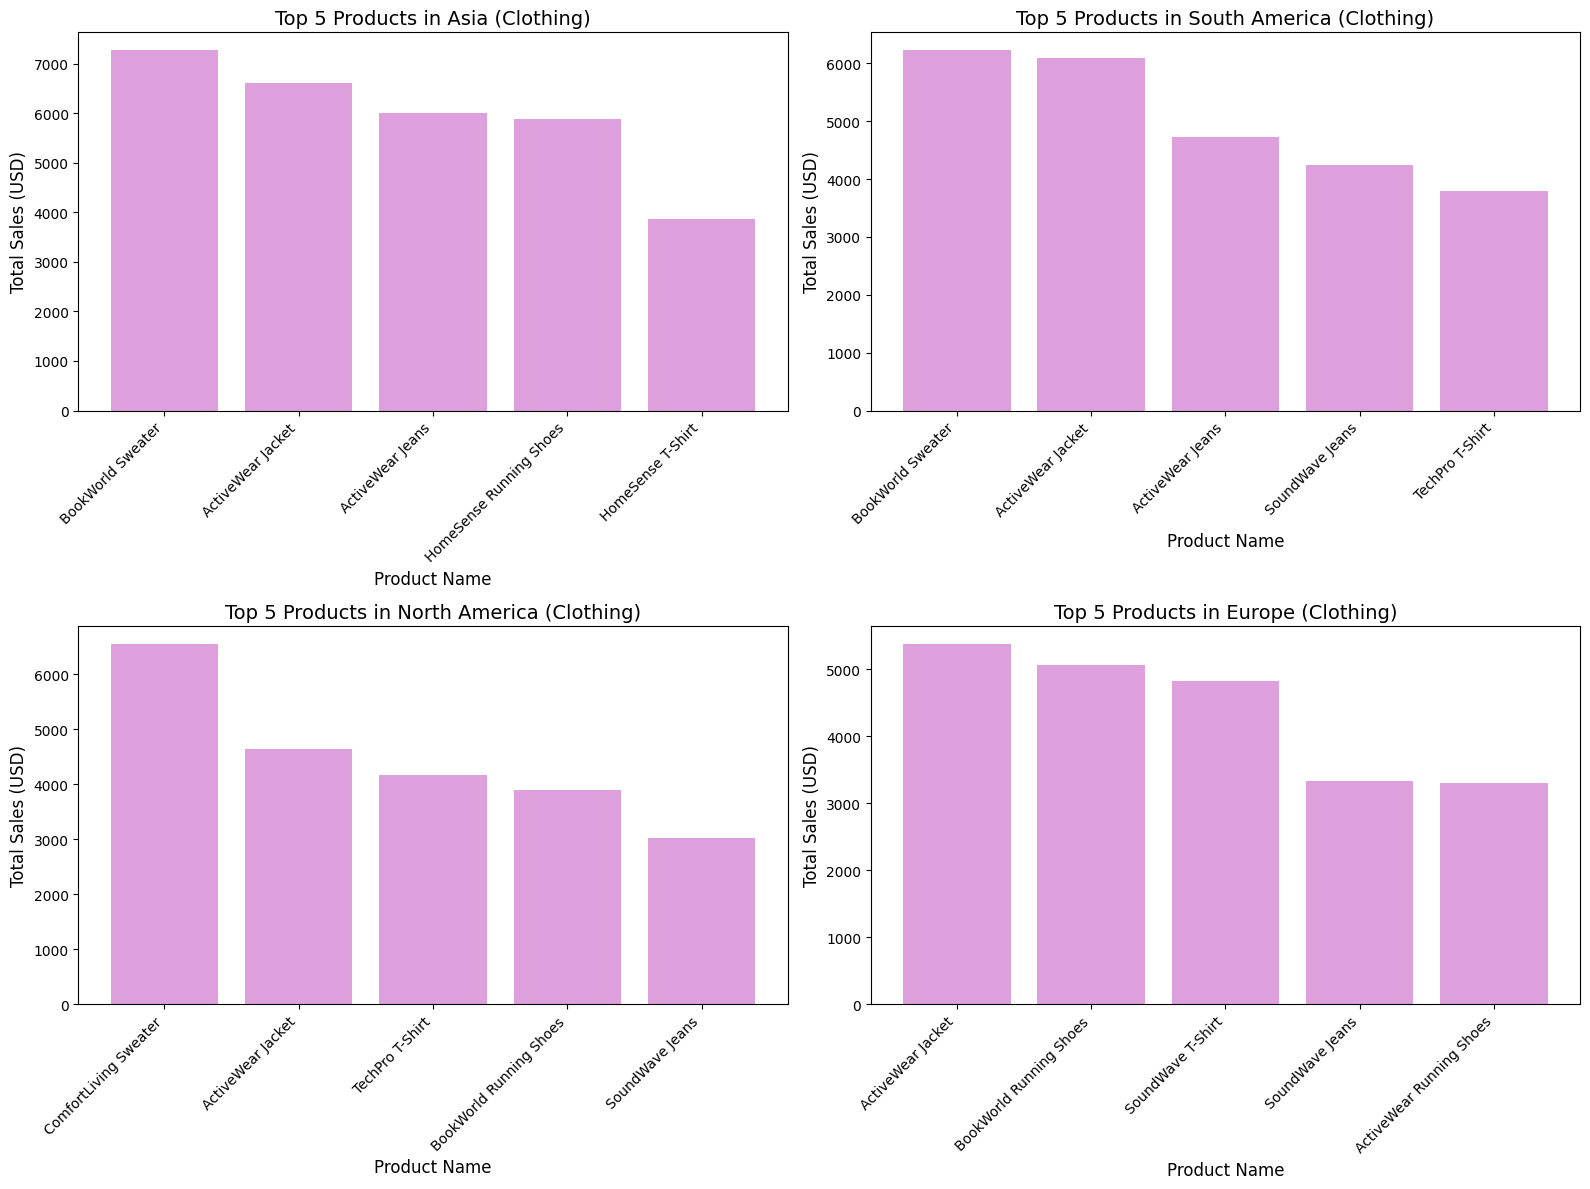

In [ ]:
clothing_regions = clothing_region_sales.head(4).index

clothing_filtered_data = clothing_data[clothing_data['Region'].isin(clothing_regions)]

clothing_region_product_sales = (
    clothing_filtered_data.groupby(['Region', 'ProductName'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(by='TotalValue', ascending=False)
)

clothing_top_products_per_region = (
    clothing_region_product_sales.groupby('Region')
    .head(5)
    .sort_values(['Region', 'TotalValue'], ascending=[True, False])
)

plt.figure(figsize=(16, 12))

for idx, region in enumerate(clothing_regions, 1):
    region_data = clothing_top_products_per_region[clothing_top_products_per_region['Region'] == region]

    plt.subplot(2, 2, idx)
    plt.bar(region_data['ProductName'], region_data['TotalValue'], color='plum')
    plt.title(f"Top 5 Products in {region} (Clothing)", fontsize=14)
    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Total Sales (USD)", fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Books Sales Break up

In [ ]:
books_data = merged_data[merged_data['Category'] == 'Books']

books_product_sales = books_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
books_region_sales = books_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
books_monthly_sales = books_data.groupby(books_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

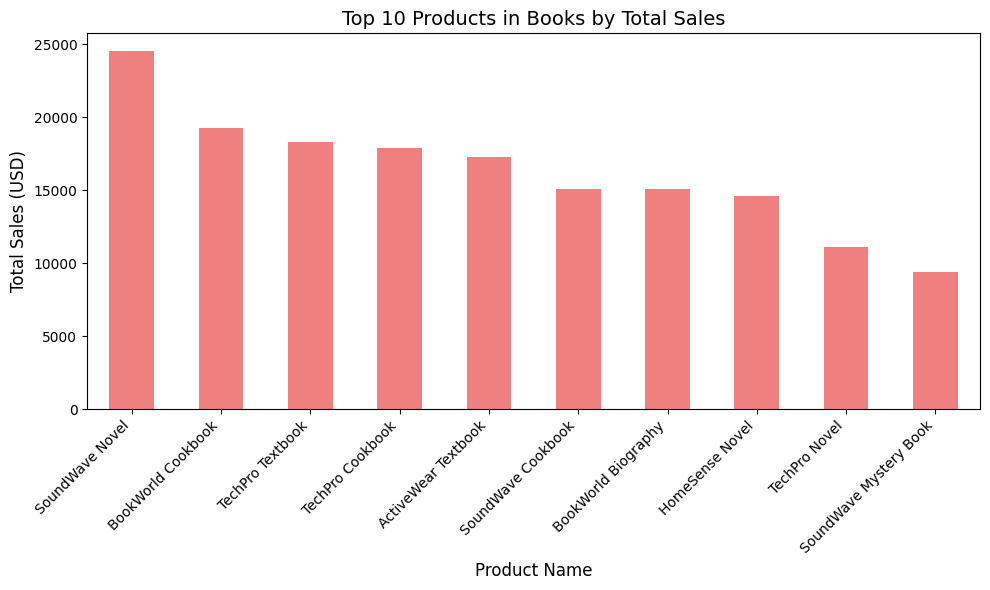

In [ ]:
books_monthly_sales = books_monthly_sales[books_monthly_sales != 0]

plt.figure(figsize=(10, 6))
books_product_sales.head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Products in Books by Total Sales", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

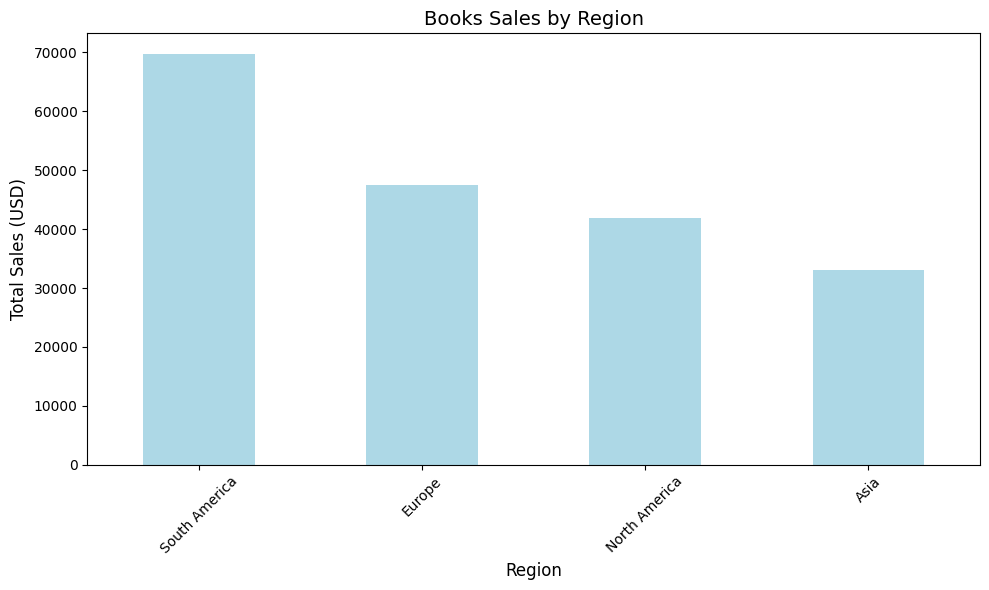

In [ ]:
plt.figure(figsize=(10, 6))
books_region_sales.plot(kind='bar', color='lightblue')
plt.title("Books Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


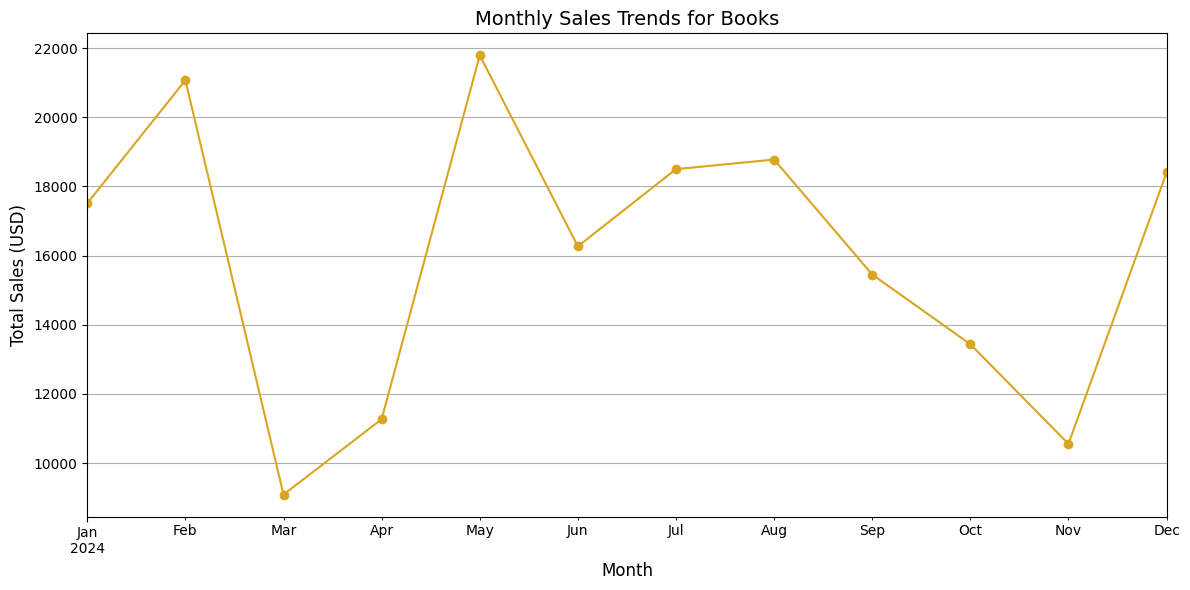

In [ ]:
plt.figure(figsize=(12, 6))
books_monthly_sales.plot(kind='line', marker='o', color='goldenrod')
plt.title("Monthly Sales Trends for Books", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


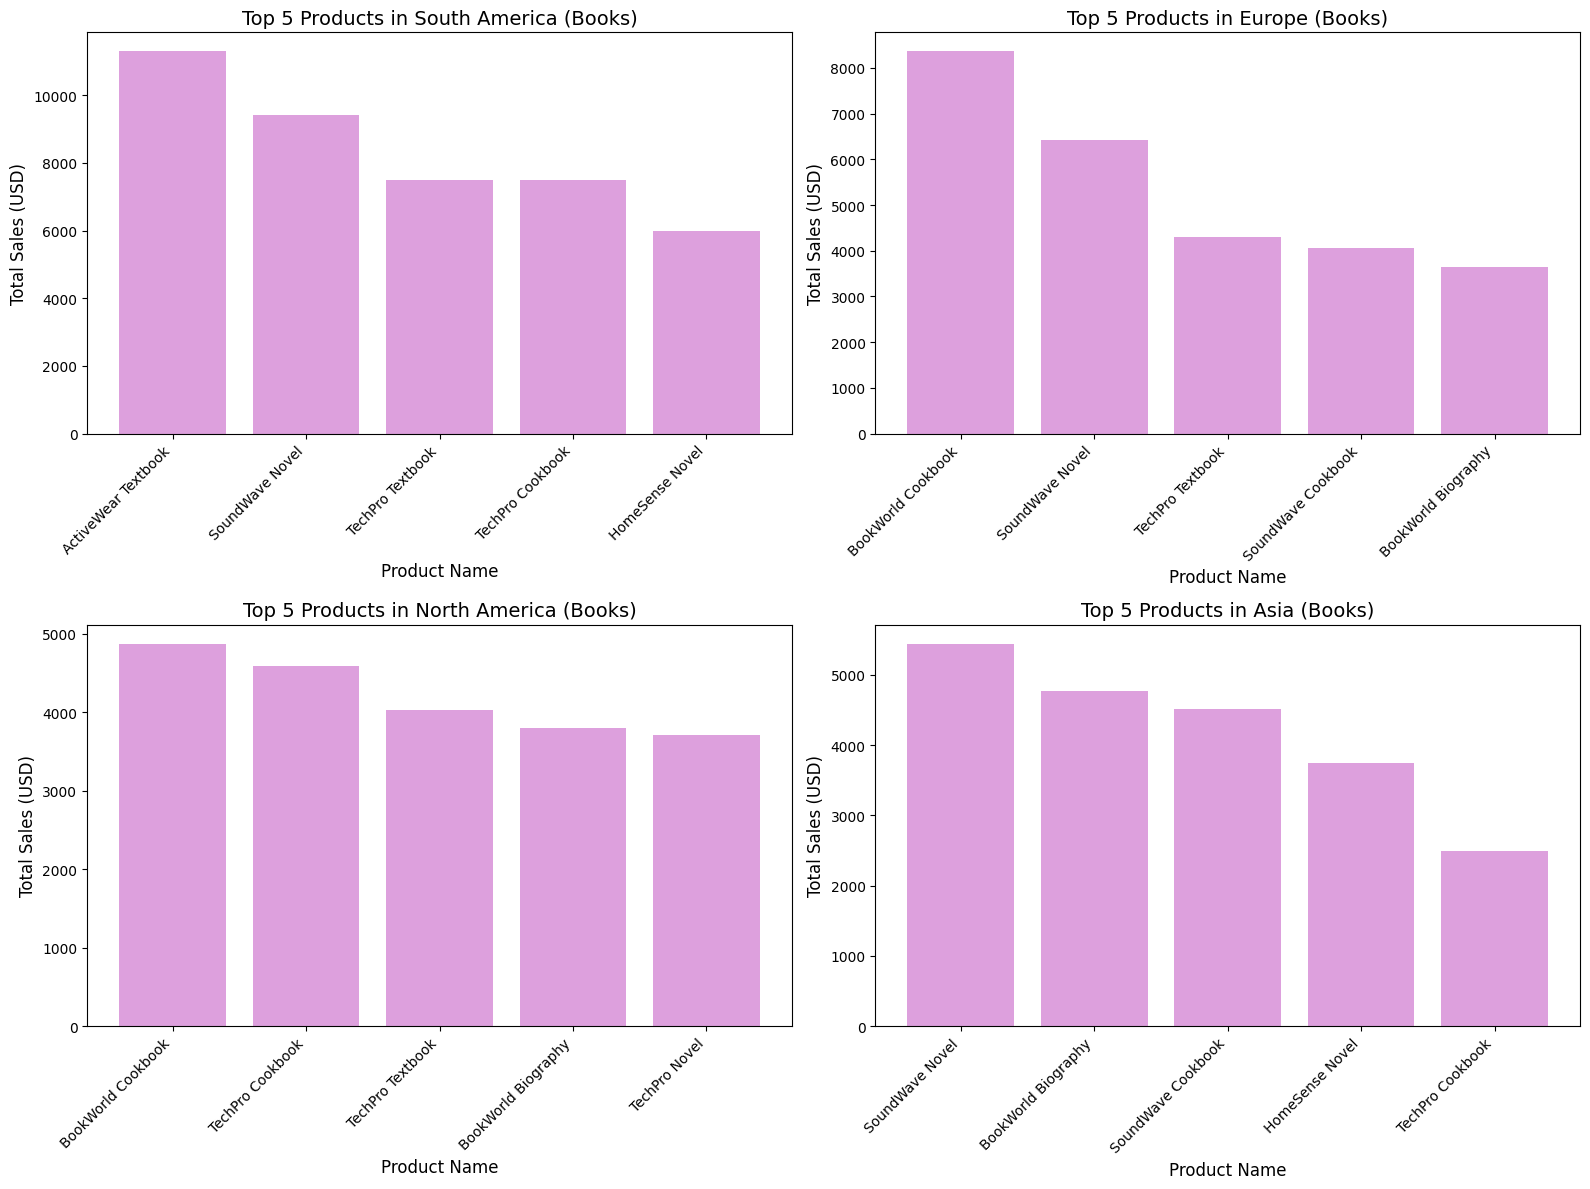

In [ ]:
books_top_regions = books_region_sales.head(4).index

books_filtered_data = books_data[books_data['Region'].isin(books_top_regions)]

books_region_product_sales = (
    books_filtered_data.groupby(['Region', 'ProductName'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(by='TotalValue', ascending=False)
)

books_top_products_per_region = (
    books_region_product_sales.groupby('Region')
    .head(5)
    .sort_values(['Region', 'TotalValue'], ascending=[True, False])
)

plt.figure(figsize=(16, 12))

for idx, region in enumerate(books_top_regions, 1):
    region_data = books_top_products_per_region[books_top_products_per_region['Region'] == region]

    plt.subplot(2, 2, idx)
    plt.bar(region_data['ProductName'], region_data['TotalValue'], color='plum')
    plt.title(f"Top 5 Products in {region} (Books)", fontsize=14)
    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Total Sales (USD)", fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
